Title: Robotic Arm Motion Dataset

Description:
This dataset contains motion data captured from a real-world robotic arm equipped with various sensors. The robotic arm has three degrees of freedom and is capable of performing complex motions in three-dimensional space. The dataset includes multiple trajectories executed by the robotic arm, each consisting of 10,000 data points.

Content:

Axis_X_Angle: Angle of rotation around the X-axis of the robotic arm.
Axis_Y_Angle: Angle of rotation around the Y-axis of the robotic arm.
Axis_Z_Angle: Angle of rotation around the Z-axis of the robotic arm.
Features:

The data captures the angular rotation of the robotic arm along three axes.
Each trajectory represents a sequence of movements performed by the robotic arm in three-dimensional space.
Motion data includes variations due to factors such as inertia, hydraulic response delay, and subtle mechanical irregularities.
Use Cases:

Robotics research: The dataset can be used to analyze and understand the motion dynamics of robotic arms in real-world scenarios.
Machine learning: Researchers and practitioners can use this dataset to train and evaluate algorithms for robotic motion prediction and control.
Industrial automation: Insights from the dataset can inform the development of robotic systems for tasks such as pick-and-place operations, assembly, and manufacturing.
Acknowledgements:
The data was collected from a custom-built robotic arm equipped with high-precision sensors in a controlled laboratory environment. We would like to acknowledge the contributions of our research team in capturing and curating the dataset.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/robotic-arm-dataset-multiple-trajectories/robotic_arm_dataset_multiple_trajectories.csv


In [2]:
import pandas as pd

# Φόρτωση του dataset
df = pd.read_csv('/kaggle/input/robotic-arm-dataset-multiple-trajectories/robotic_arm_dataset_multiple_trajectories.csv')

# Δείξε τις πρώτες γραμμές για να δεις τη δομή
print(df.head())

# Πληροφορίες για τις στήλες και τον τύπο δεδομένων
print(df.info())

# Περιγραφικά στατιστικά
print(df.describe())


   Axis_0_Angle  Axis_1_Angle  Axis_2_Angle
0      0.016775     -0.044620     -0.007160
1     -0.034135     -0.072073      0.049474
2     -0.020503     -0.101122      0.067382
3     -0.010456     -0.036021      0.046943
4     -0.023661      0.004108      0.040663
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152500 entries, 0 to 152499
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Axis_0_Angle  152500 non-null  float64
 1   Axis_1_Angle  152500 non-null  float64
 2   Axis_2_Angle  152500 non-null  float64
dtypes: float64(3)
memory usage: 3.5 MB
None
        Axis_0_Angle   Axis_1_Angle   Axis_2_Angle
count  152500.000000  152500.000000  152500.000000
mean       -0.983302       0.000180       4.917986
std         4.967935       5.113029       2.933705
min       -11.362521      -9.762293      -0.251069
25%        -4.329537      -3.037366       2.375450
50%        -0.001038       0.000000       4.916169
75% 

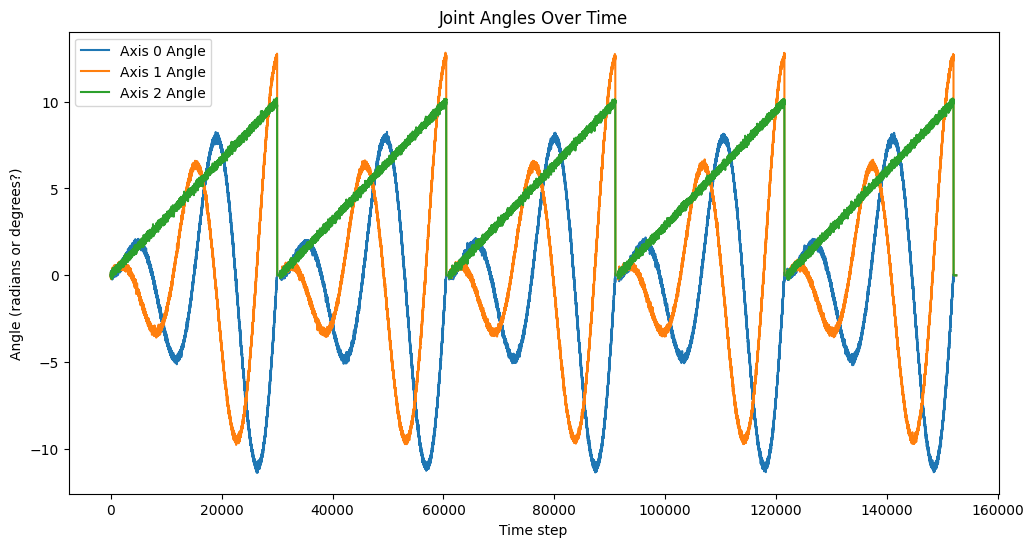

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Axis_0_Angle'], label='Axis 0 Angle')
plt.plot(df['Axis_1_Angle'], label='Axis 1 Angle')
plt.plot(df['Axis_2_Angle'], label='Axis 2 Angle')
plt.title('Joint Angles Over Time')
plt.xlabel('Time step')
plt.ylabel('Angle (radians or degrees?)')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


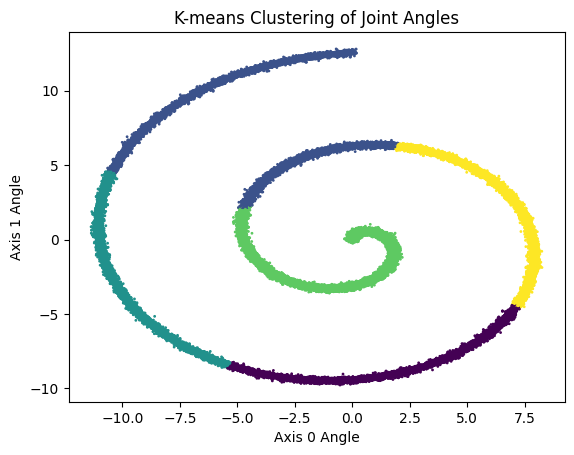

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(df)

plt.scatter(df['Axis_0_Angle'], df['Axis_1_Angle'], c=clusters, cmap='viridis', s=1)
plt.xlabel('Axis 0 Angle')
plt.ylabel('Axis 1 Angle')
plt.title('K-means Clustering of Joint Angles')
plt.show()


In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Δημιουργία features: Γωνίες στο χρόνο t
X = df[['Axis_0_Angle', 'Axis_1_Angle', 'Axis_2_Angle']].iloc[:-1]
# Στόχος: Γωνία Axis_0 στο χρόνο t+1
y = df['Axis_0_Angle'].iloc[1:]

model = LinearRegression()
model.fit(X, y)

print(f'R^2 score: {model.score(X, y):.4f}')


R^2 score: 0.9998


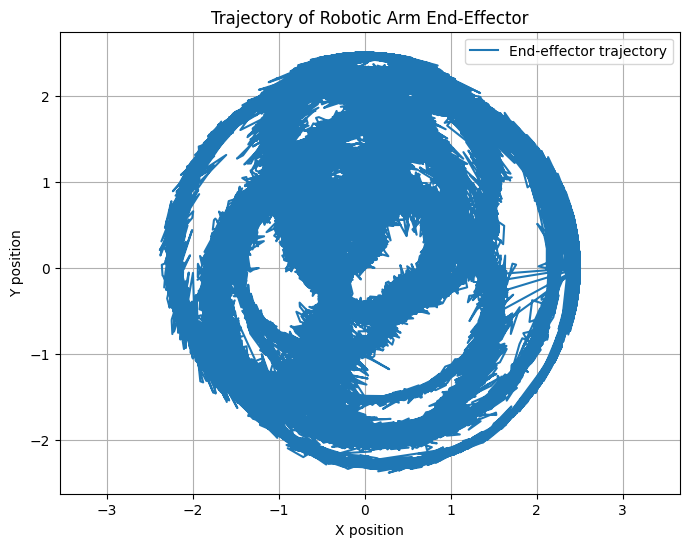

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Υποθέτουμε μήκη τμημάτων (σε όποια μονάδα έχεις)
L0, L1, L2 = 1.0, 1.0, 0.5  # μπορείς να τα προσαρμόσεις

# Γωνίες από το dataframe (σε rad)
theta0 = df['Axis_0_Angle'].values
theta1 = df['Axis_1_Angle'].values
theta2 = df['Axis_2_Angle'].values

# Υπολογισμός θέσεων αρθρώσεων
x0, y0 = 0, 0
x1 = L0 * np.cos(theta0)
y1 = L0 * np.sin(theta0)

x2 = x1 + L1 * np.cos(theta0 + theta1)
y2 = y1 + L1 * np.sin(theta0 + theta1)

x3 = x2 + L2 * np.cos(theta0 + theta1 + theta2)
y3 = y2 + L2 * np.sin(theta0 + theta1 + theta2)

# Απεικόνιση της τροχιάς του end-effector (τελευταίο σημείο)
plt.figure(figsize=(8,6))
plt.plot(x3, y3, label='End-effector trajectory')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.title('Trajectory of Robotic Arm End-Effector')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


In [7]:
import numpy as np

# Επιλογή χαρακτηριστικών
angles = df[['Axis_0_Angle', 'Axis_1_Angle', 'Axis_2_Angle']].values

# Δημιουργία dataset: X_t -> Y_(t+1)
X = angles[:-1]
y = angles[1:]

# Κανονικοποίηση (προαιρετικό, αλλά βοηθάει στην εκπαίδευση)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.transform(y)

# Μετατροπή σε μορφή [samples, timesteps, features]
# Εδώ το timesteps=1 (προβλέπουμε επόμενο βήμα από τρέχον)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='tanh', input_shape=(1, 3)),
    Dense(3)
])

model.compile(optimizer='adam', loss='mse')

# Εκπαίδευση
history = model.fit(X_scaled, y_scaled, epochs=20, batch_size=64, validation_split=0.2)


2025-07-21 09:08:27.761790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753088908.011892      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753088908.087491      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-21 09:08:43.590096: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead

Epoch 1/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0346 - val_loss: 1.0114e-04
Epoch 2/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.5605e-05 - val_loss: 4.9349e-05
Epoch 3/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.0197e-05 - val_loss: 4.3509e-05
Epoch 4/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.7777e-05 - val_loss: 4.2422e-05
Epoch 5/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.5385e-05 - val_loss: 4.1146e-05
Epoch 6/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.8099e-05 - val_loss: 4.1995e-05
Epoch 7/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.3423e-05 - val_loss: 4.3329e-05
Epoch 8/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.8553e-05 - val_loss: 4.1323e-05
Epoch 9/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.7831e-05 - val_loss: 4.1599e-05
Epoch 10/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.7211e-05 - val_loss: 4.0179e-05
Epoch 11/20
1907/1907 ━━━━━━━━━━━━━━━━━━━━ 

In [10]:
# Πρόβλεψη επόμενου βήματος για τα πρώτα 10 δείγματα
predictions = model.predict(X_scaled[:10])

# Επαναφορά κλίμακας στις γωνίες
predictions_original = scaler.inverse_transform(predictions)

print("Πραγματικές γωνίες (t+1):")
print(y[:10])
print("Προβλεπόμενες γωνίες (t+1):")
print(predictions_original)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Πραγματικές γωνίες (t+1):
[[-0.03413518 -0.07207326  0.04947407]
 [-0.02050324 -0.10112224  0.06738181]
 [-0.01045601 -0.03602089  0.04694264]
 [-0.0236608   0.00410803  0.04066307]
 [-0.05501085  0.05764982  0.05240536]
 [-0.01746334  0.01460679  0.09455169]
 [-0.07090527 -0.02656797  0.14132037]
 [ 0.04322377 -0.05294253  0.2057604 ]
 [ 0.01499864  0.16198239 -0.00271106]
 [-0.00743835  0.14370191  0.00176462]]
Προβλεπόμενες γωνίες (t+1):
[[ 0.02689065 -0.03015704  0.01992121]
 [-0.02285595 -0.05731495  0.07530299]
 [-0.00965193 -0.08579011  0.09305985]
 [ 0.00049782 -0.02256967  0.07279402]
 [-0.01218235  0.0164059   0.06640989]
 [-0.04247137  0.06818407  0.0775708 ]
 [-0.00592763  0.02567113  0.11926536]
 [-0.05835081 -0.0145652   0.16505654]
 [ 0.05333026 -0.04185362  0.22899555]
 [ 0.02646034  0.1693548   0.0235216 ]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# 1. Διάβασμα και προετοιμασία δεδομένων
angles = df[['Axis_0_Angle', 'Axis_1_Angle', 'Axis_2_Angle']].values

# Κανονικοποίηση
scaler = MinMaxScaler()
angles_scaled = scaler.fit_transform(angles)

# Δημιουργία παραθύρων (timesteps=10)
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(angles_scaled, seq_length=10)

# Διαχωρισμός σε train/test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}')

# 2. Δημιουργία μοντέλου
model = Sequential([
    LSTM(100, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(3)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks για early stopping και learning rate scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# 3. Εκπαίδευση
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=64, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, reduce_lr])

# 4. Αξιολόγηση μοντέλου
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')

# 5. Οπτικοποίηση απωλειών
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# 6. Πρόβλεψη και επαναφορά κλίμακας
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test)

# Οπτικοποίηση σύγκρισης πραγματικών και προβλεπόμενων γωνιών για τις 3 αρθρώσεις
plt.figure(figsize=(15,5))
for i, joint in enumerate(['Axis_0_Angle', 'Axis_1_Angle', 'Axis_2_Angle']):
    plt.subplot(1,3,i+1)
    plt.plot(y_true[:100,i], label='True')
    plt.plot(y_pred[:100,i], label='Predicted')
    plt.title(f'{joint} - First 100 samples')
    plt.legend()
plt.tight_layout()
plt.show()
